In [40]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer,recall_score

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


        TRAIN

In [41]:
df_train = pd.read_csv('train.csv')
df_train

,customer_id,customer_age,education_level,marital_status,income_category,number_products_customer,weeks_tenure,contacts_last_12mths,credit_limit,card_class,inactive_months_last_12mths,total_revolving_balance,count_transactions,transactions_amount,change_transaction_amt_last_3mths,change_transaction_count_last_3mths,churn
0,4278,NaN,phd,NaN,30k€-50k€,4,216,1,16541.0,red plus,2,1428,82,4352,0.846,0.907,0
1,7300,45.0,graduate,single,<30k€,5,115,3,1438.3,red,3,576,66,5098,0.774,0.833,0
2,6857,NaN,uneducated,married,30k€-50k€,6,172,2,2293.0,red,1,1460,74,4436,0.658,0.542,0
3,2508,39.0,graduate,married,70k€-110k€,5,124,2,17523.0,red,2,0,54,1974,0.424,0.688,1
4,7859,40.0,graduate,single,<30k€,2,107,2,4391.0,red,2,1933,36,1849,0.579,0.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,8590,27.0,high school,single,NaN,5,147,3,3184.0,red,2,1421,59,2253,0.712,0.439,0
4388,8131,50.0,NaN,married,<30k€,3,175,0,5139.0,red,3,0,44,1653,0.330,0.692,1
4389,3445,48.0,uneducated,single,<30k€,3,180,2,2094.0,red,3,0,46,2690,0.897,0.484,1
4390,2832,NaN,graduate,divorced,30k€-50k€,1,116,3,5821.0,red,2,894,42,2011,0.461,0.273,1


In [42]:
# Busco nulls
df_train.isnull().sum()/len(df_train)*100

customer_id                             0.000000
customer_age                            9.767760
education_level                        14.959016
marital_status                          7.240437
income_category                        11.407104
number_products_customer                0.000000
weeks_tenure                            0.000000
contacts_last_12mths                    0.000000
credit_limit                            0.000000
card_class                              0.000000
inactive_months_last_12mths             0.000000
total_revolving_balance                 0.000000
count_transactions                      0.000000
transactions_amount                     0.000000
change_transaction_amt_last_3mths       0.000000
change_transaction_count_last_3mths     0.000000
churn                                   0.000000
dtype: float64

In [43]:
# DataFrame solo con los numericos
df_num = df_train._get_numeric_data()

# DataFrame solo con los categóricos
df_categ = df_train.drop(df_num.columns, axis=1)

In [44]:
# Imputa el valor medio de sus vecinos a las columnas numericas
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_num_neig = imputer.fit_transform(df_num)
df_num_neig = pd.DataFrame(df_num_neig, columns=df_num.columns)
df_num_neig.head()

,customer_id,customer_age,number_products_customer,weeks_tenure,contacts_last_12mths,credit_limit,inactive_months_last_12mths,total_revolving_balance,count_transactions,transactions_amount,change_transaction_amt_last_3mths,change_transaction_count_last_3mths,churn
0,4278.0,47.6,4.0,216.0,1.0,16541.0,2.0,1428.0,82.0,4352.0,0.846,0.907,0.0
1,7300.0,45.0,5.0,115.0,3.0,1438.3,3.0,576.0,66.0,5098.0,0.774,0.833,0.0
2,6857.0,51.4,6.0,172.0,2.0,2293.0,1.0,1460.0,74.0,4436.0,0.658,0.542,0.0
3,2508.0,39.0,5.0,124.0,2.0,17523.0,2.0,0.0,54.0,1974.0,0.424,0.688,1.0
4,7859.0,40.0,2.0,107.0,2.0,4391.0,2.0,1933.0,36.0,1849.0,0.579,0.385,1.0


In [45]:
# Imputo el valor con mayor frecuencia a las columnas categoricas
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_categ_frec = imputer.fit_transform(df_categ)
df_categ_frec = pd.DataFrame(df_categ_frec, columns = df_categ.columns)
df_categ_frec.head()

,education_level,marital_status,income_category,card_class
0,phd,married,30k€-50k€,red plus
1,graduate,single,<30k€,red
2,uneducated,married,30k€-50k€,red
3,graduate,married,70k€-110k€,red
4,graduate,single,<30k€,red


In [46]:
# df train sin nulls
df_train_clean = df_num_neig.copy()
df_train_clean = pd.concat([df_train_clean, df_categ_frec], sort=False, axis = 1)
df_train_clean.shape

(4392, 17)

        TEST

In [47]:
df_test = pd.read_csv('test.csv')
df_test.isnull().sum()

customer_id                              0
customer_age                           195
education_level                        279
marital_status                         142
income_category                        202
number_products_customer                 0
weeks_tenure                             0
contacts_last_12mths                     0
credit_limit                             0
card_class                               0
inactive_months_last_12mths              0
total_revolving_balance                  0
count_transactions                       0
transactions_amount                      0
change_transaction_amt_last_3mths        0
change_transaction_count_last_3mths      0
dtype: int64

In [48]:
# DataFrame solo con los numericos
df_num_t = df_test._get_numeric_data()

# DataFrame solo con los categóricos
df_categ_t = df_test.drop(df_num_t.columns, axis=1)

In [49]:
# Imputa el valor medio de sus vecinos a las columnas numericas
imputer = KNNImputer(n_neighbors=5)
df_num_neig_t = imputer.fit_transform(df_num_t)
df_num_neig_t = pd.DataFrame(df_num_neig_t, columns=df_num_t.columns)
df_num_neig_t.head()

,customer_id,customer_age,number_products_customer,weeks_tenure,contacts_last_12mths,credit_limit,inactive_months_last_12mths,total_revolving_balance,count_transactions,transactions_amount,change_transaction_amt_last_3mths,change_transaction_count_last_3mths
0,4527.0,46.0,5.0,142.0,3.0,9852.0,2.0,2277.0,71.0,3813.0,0.831,0.614
1,4166.0,47.0,4.0,131.0,2.0,1438.3,1.0,0.0,26.0,1468.0,0.810,0.625
2,4409.0,39.0,4.0,156.0,2.0,3264.0,3.0,2042.0,75.0,4624.0,0.752,0.705
3,6376.0,39.0,5.0,116.0,3.0,4693.0,1.0,634.0,79.0,4460.0,0.909,0.837
4,6367.0,42.0,2.0,115.0,0.0,2275.0,2.0,1265.0,77.0,5626.0,0.755,1.081


In [50]:
# Imputo el valor con mayor frecuencia a las columnas categoricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_categ_frec_t = imputer.fit_transform(df_categ_t)
df_categ_frec_t = pd.DataFrame(df_categ_frec_t, columns = df_categ_t.columns)
df_categ_frec_t.head()

,education_level,marital_status,income_category,card_class
0,high school,married,70k€-110k€,red
1,college,single,50k€-70k€,red
2,college,divorced,<30k€,red
3,college,married,<30k€,red
4,uneducated,married,<30k€,red


In [51]:
# df test sin nulls
df_test_clean = df_num_neig_t.copy()
df_test_clean = pd.concat([df_test_clean, df_categ_frec_t], sort=False, axis = 1)
df_test_clean.shape

(1883, 16)

        GRAFICOS - ANÁLISIS DATOS

In [52]:
# Matriz de correlaciones
matriz_correlaciones = df_train_clean.corr()
# sns.heatmap(matriz_correlaciones, cmap="Blues")
# plt.show()

C:\Users\Ranchos\AppData\Local\Temp\ipykernel_19604\1938798555.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlaciones = df_train_clean.corr()


In [53]:
# sns.histplot(df_train_clean['customer_age'], kde=True)
# plt.show()

        DUMMIES

In [54]:
# Dummies de variables categóricas - Train
df_dummies = pd.concat([df_categ_frec, df_num_neig[['number_products_customer','contacts_last_12mths','inactive_months_last_12mths']]], sort=False, axis = 1).astype(str)
cat_dummies = pd.get_dummies(df_dummies, drop_first=True)
cat_dummies.head()

,education_level_graduate,education_level_high school,education_level_phd,education_level_post-graduate,education_level_uneducated,marital_status_married,marital_status_single,income_category_30k€-50k€,income_category_50k€-70k€,income_category_70k€-110k€,...,contacts_last_12mths_3.0,contacts_last_12mths_4.0,contacts_last_12mths_5.0,contacts_last_12mths_6.0,inactive_months_last_12mths_1.0,inactive_months_last_12mths_2.0,inactive_months_last_12mths_3.0,inactive_months_last_12mths_4.0,inactive_months_last_12mths_5.0,inactive_months_last_12mths_6.0
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
# Datos numéricos - Train
num_model = df_num_neig.drop(['customer_id', 'churn','number_products_customer','contacts_last_12mths','inactive_months_last_12mths'], axis=1)
num_model.head()

,customer_age,weeks_tenure,credit_limit,total_revolving_balance,count_transactions,transactions_amount,change_transaction_amt_last_3mths,change_transaction_count_last_3mths
0,47.6,216.0,16541.0,1428.0,82.0,4352.0,0.846,0.907
1,45.0,115.0,1438.3,576.0,66.0,5098.0,0.774,0.833
2,51.4,172.0,2293.0,1460.0,74.0,4436.0,0.658,0.542
3,39.0,124.0,17523.0,0.0,54.0,1974.0,0.424,0.688
4,40.0,107.0,4391.0,1933.0,36.0,1849.0,0.579,0.385


In [56]:
# DF listo para modelo - Train
df_model = pd.concat([cat_dummies, num_model], axis=1)
df_model.shape

(4392, 39)

In [57]:
# Dummies de variables categóricas - Test
df_dummies_t = pd.concat([df_categ_frec_t, df_num_neig_t[['number_products_customer','contacts_last_12mths','inactive_months_last_12mths']]], sort=False, axis = 1).astype(str)
cat_dummies_t = pd.get_dummies(df_dummies_t, drop_first=True)
cat_dummies_t.head()

,education_level_graduate,education_level_high school,education_level_phd,education_level_post-graduate,education_level_uneducated,marital_status_married,marital_status_single,income_category_30k€-50k€,income_category_50k€-70k€,income_category_70k€-110k€,...,contacts_last_12mths_3.0,contacts_last_12mths_4.0,contacts_last_12mths_5.0,contacts_last_12mths_6.0,inactive_months_last_12mths_1.0,inactive_months_last_12mths_2.0,inactive_months_last_12mths_3.0,inactive_months_last_12mths_4.0,inactive_months_last_12mths_5.0,inactive_months_last_12mths_6.0
0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
# Datos numéricos - Test
num_model_t = df_num_neig_t.drop(['customer_id','number_products_customer','contacts_last_12mths','inactive_months_last_12mths'], axis=1)
num_model_t.head()

,customer_age,weeks_tenure,credit_limit,total_revolving_balance,count_transactions,transactions_amount,change_transaction_amt_last_3mths,change_transaction_count_last_3mths
0,46.0,142.0,9852.0,2277.0,71.0,3813.0,0.831,0.614
1,47.0,131.0,1438.3,0.0,26.0,1468.0,0.810,0.625
2,39.0,156.0,3264.0,2042.0,75.0,4624.0,0.752,0.705
3,39.0,116.0,4693.0,634.0,79.0,4460.0,0.909,0.837
4,42.0,115.0,2275.0,1265.0,77.0,5626.0,0.755,1.081


In [59]:
# DF listo para modelo - Test
df_model_t = pd.concat([cat_dummies_t, num_model_t], axis=1)
df_model_t.shape

(1883, 39)

        RANDOM FOREST

In [60]:
params={'max_depth': [6,7],                             # Maxima pofundidad del arbol
        'max_leaf_nodes': [28,30,32],                   # maximo de hojas del arbol
        'min_impurity_decrease' : [0.08,0.01,0.012],    # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [45,50,55],                # The minimum number of samples required to split an internal node
        'ccp_alpha': [0.0,0.05]                         # 2
        }

In [61]:
X_train = df_model.copy()
y_train = df_train_clean['churn']

X_test = df_model_t.copy()

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.3)

In [63]:
scorers = {"f1_macro","accuracy","recall_macro"}
clf = RandomForestClassifier()
grid_solver = GridSearchCV(estimator = clf, 
                   param_grid = params, 
                   scoring=scorers,
                   cv = 5,
                   refit="f1_macro",
                   verbose = 1)

model_result = grid_solver.fit(X_train1,y_train1)

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())
print(model_result.best_score_)
print(model_result.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.5350680596272864
0.48671556487847867
0.7596329742522904
0.6798310803163793
{'ccp_alpha': 0.0, 'max_depth': 7, 'max_leaf_nodes': 30, 'min_impurity_decrease': 0.01, 'min_samples_split': 50}


Accuracy:  0.9309559939301972
F1: 0.8614916286149163
AUC: 0.9794839386359553
[[944  23]
 [ 68 283]]


c:\Users\Ranchos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


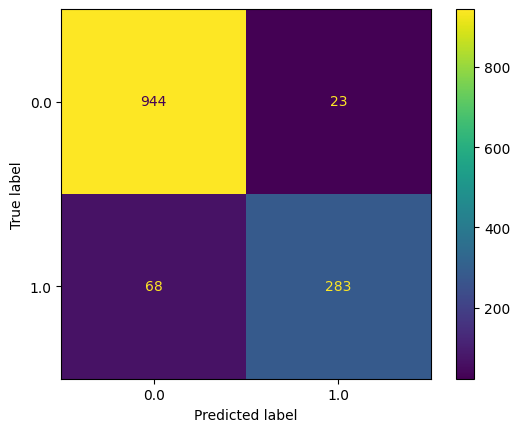

In [64]:
# Modelo sin especifiación de parámetros
randomforest = RandomForestClassifier()
randomforest.fit(X_train1,y_train1)

yhat = randomforest.predict(X_test1)
print("Accuracy: ", accuracy_score(y_test1,yhat))
f1 = metrics.f1_score(y_test1, yhat)
print('F1: ' + str(f1))

y_probabilidades = randomforest.predict_proba(X_test1)
fpr, tpr, thresh = metrics.roc_curve(y_test1, y_probabilidades[:,1])
roc_auc = metrics.auc(fpr, tpr)    
print('AUC: ' + str(roc_auc))

confusion_tree = confusion_matrix(y_test1, yhat)
print(confusion_tree)
plot_confusion_matrix(randomforest, X_test1, y_test1)

In [65]:
print("Train score", randomforest.score(X_train1,y_train1))
print("Test score", randomforest.score(X_test1, y_test1))
# train
y_pred=randomforest.predict(X_train1)
probs=randomforest.predict_proba(X_train1)
print("Train AUC", roc_auc_score(y_train1, probs[:,1]))
print("Train Accuracy", accuracy_score(y_train1,y_pred))
# test
y_pred=randomforest.predict(X_test1)
probs=randomforest.predict_proba(X_test1)
print("Test AUC", roc_auc_score(y_test1, probs[:,1]))
print("Test Accuracy",  accuracy_score(y_test1,y_pred))

Train score 1.0
Test score 0.9309559939301972
Train AUC 1.0
Train Accuracy 1.0
Test AUC 0.9794839386359553
Test Accuracy 0.9309559939301972


        F1 0.81

Accuracy:  0.8968133535660091
F1: 0.8095238095238096
AUC: 0.9137786262915529
[[893  74]
 [ 62 289]]


c:\Users\Ranchos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


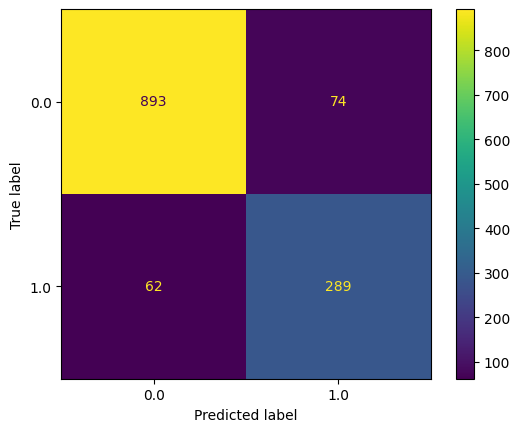

In [66]:
# Mejor modelo especificando parámetros
clasificador_tree = DecisionTreeClassifier(ccp_alpha= 0.0, max_depth= 4, max_leaf_nodes= 32, min_impurity_decrease= 0.01, min_samples_split= 50)
clasificador_tree.fit(X_train1,y_train1)

yhat = clasificador_tree.predict(X_test1)
print("Accuracy: ", accuracy_score(y_test1,yhat))
f1 = metrics.f1_score(y_test1, yhat)
print('F1: ' + str(f1))

y_probabilidades = clasificador_tree.predict_proba(X_test1)
fpr, tpr, thresh = metrics.roc_curve(y_test1, y_probabilidades[:,1])
roc_auc = metrics.auc(fpr, tpr)    
print('AUC: ' + str(roc_auc))

confusion_tree = confusion_matrix(y_test1, yhat)
print(confusion_tree)
plot_confusion_matrix(clasificador_tree, X_test1, y_test1)

In [67]:
print("Train score", clasificador_tree.score(X_train1,y_train1))
print("Test score", clasificador_tree.score(X_test1, y_test1))
# train
y_pred=clasificador_tree.predict(X_train1)
probs=clasificador_tree.predict_proba(X_train1)
print("Train AUC", roc_auc_score(y_train1, probs[:,1]))
print("Train Accuracy", accuracy_score(y_train1,y_pred))
# test
y_pred=clasificador_tree.predict(X_test1)
probs=clasificador_tree.predict_proba(X_test1)
print("Test AUC", roc_auc_score(y_test1, probs[:,1]))
print("Test Accuracy",  accuracy_score(y_test1,y_pred))

Train score 0.896551724137931
Test score 0.8968133535660091
Train AUC 0.9170454099411057
Train Accuracy 0.896551724137931
Test AUC 0.9137786262915529
Test Accuracy 0.8968133535660091


        CREAR ARCHIVO - RESULTADOS

In [68]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)

y_pred_test=randomforest.predict(X_test)
y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [69]:
df_pred = pd.DataFrame(y_pred_test, columns=['churn'])

In [70]:
df_result = df_test['customer_id']
df_result = pd.concat([df_result,df_pred], axis=1)
df_result['churn'] = df_result['churn'].astype(int)
df_result


,customer_id,churn
0,4527,0
1,4166,0
2,4409,0
3,6376,0
4,6367,0
...,...,...
1878,5704,1
1879,6371,0
1880,3073,0
1881,1912,0


In [71]:
df_result.to_csv('fuga_julianagilnavarro_randomforest.csv')

In [72]:
clasificador_tree = DecisionTreeClassifier(ccp_alpha= 0.0, max_depth= 4, max_leaf_nodes= 32, min_impurity_decrease= 0.01, min_samples_split= 50)
clasificador_tree.fit(X_train,y_train)

y_pred_test=clasificador_tree.predict(X_test)
df_pred = pd.DataFrame(y_pred_test, columns=['churn'])

df_result = df_test['customer_id']
df_result = pd.concat([df_result,df_pred], axis=1)
df_result['churn'] = df_result['churn'].astype(int)
df_result

,customer_id,churn
0,4527,0
1,4166,1
2,4409,0
3,6376,0
4,6367,1
...,...,...
1878,5704,1
1879,6371,0
1880,3073,0
1881,1912,0


In [73]:
df_result.to_csv('fuga_julianagilnavarro_treeclassifier.csv')

        KNN - Prueba

In [74]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.8543247344461306
F1: 0.8095238095238096
AUC: 0.8736421569927258
[[891  76]
 [116 235]]


c:\Users\Ranchos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


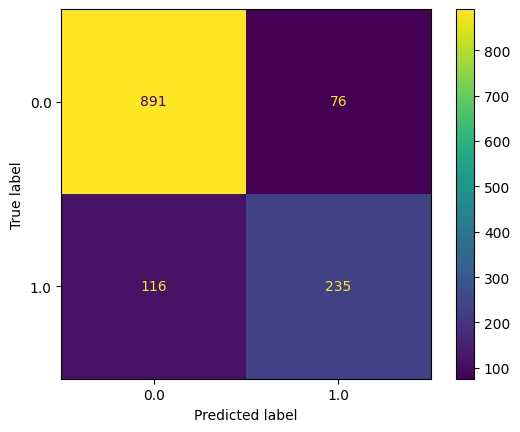

In [75]:
clasificador_knn = KNeighborsClassifier(5)          
clasificador_knn.fit(X_train1, y_train1)

yhat = clasificador_knn.predict(X_test1)
acur = accuracy_score(y_test1, yhat)
print('Accuracy: ' + str(acur))
f1 = metrics.f1_score(y_test1, y_pred)
print('F1: ' + str(f1))

y_probabilidades = clasificador_knn.predict_proba(X_test1)
fpr, tpr, thresh = metrics.roc_curve(y_test1, y_probabilidades[:,1])
roc_auc = metrics.auc(fpr, tpr)    
print('AUC: ' + str(roc_auc))

confusion_m = confusion_matrix(y_test1, yhat)
print(confusion_m)
plot_confusion_matrix(clasificador_knn, X_test1, y_test1)

In [76]:
y_pred_test=clasificador_knn.predict(X_test)
len(y_pred_test)

df_pred = pd.DataFrame(y_pred_test, columns=['churn'])

df_result = df_test['customer_id']
df_result = pd.concat([df_result,df_pred], axis=1)
df_result['churn'] = df_result['churn'].astype(int)
df_result

,customer_id,churn
0,4527,0
1,4166,0
2,4409,0
3,6376,0
4,6367,0
...,...,...
1878,5704,1
1879,6371,0
1880,3073,0
1881,1912,0


In [77]:
df_result.to_csv('fuga_julianagilnavarro_knn.csv')